# Анализ настроений в текстах

---

**Библиотеки**

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow.keras import models, layers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

**Загрузка данных**

In [3]:
test_data = pd.read_csv('Test.csv')
train_data = pd.read_csv('Train.csv')
train_data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


**Обработка данных**

In [4]:
train_texts = train_data['text'].values
train_labels = train_data['label'].values
test_texts = test_data['text'].values
test_labels = test_data['label'].values




In [14]:

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

In [15]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [27]:
X_train = pad_sequences(train_sequences, maxlen=200, padding='post', truncating='post')
X_test = pad_sequences(test_sequences, maxlen=200, padding='post', truncating='post')

**Создание модели LSTM**

In [28]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, train_labels, epochs=10, batch_size=32, verbose=1, validation_data = (X_test, test_labels))

Epoch 1/10
1250/1250 [==============================] - 354s 282ms/step - loss: 0.5933 - accuracy: 0.6772 - val_loss: 0.5976 - val_accuracy: 0.7382
Epoch 2/10
1250/1250 [==============================] - 349s 279ms/step - loss: 0.4963 - accuracy: 0.7773 - val_loss: 0.4721 - val_accuracy: 0.7692
Epoch 3/10
1250/1250 [==============================] - 338s 270ms/step - loss: 0.4397 - accuracy: 0.8067 - val_loss: 0.3270 - val_accuracy: 0.8658
Epoch 4/10
1250/1250 [==============================] - 320s 256ms/step - loss: 0.2796 - accuracy: 0.8947 - val_loss: 0.3240 - val_accuracy: 0.8690
Epoch 5/10
1250/1250 [==============================] - 318s 254ms/step - loss: 0.2266 - accuracy: 0.9191 - val_loss: 0.2999 - val_accuracy: 0.8786
Epoch 6/10
1250/1250 [==============================] - 325s 260ms/step - loss: 0.1800 - accuracy: 0.9385 - val_loss: 0.3242 - val_accuracy: 0.8756
Epoch 7/10
1250/1250 [==============================] - 311s 248ms/step - loss: 0.1320 - accuracy: 0.9572 - val_

In [31]:
loss, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: ', accuracy)

157/157 [==============================] - 12s 74ms/step - loss: 0.5890 - accuracy: 0.8646
Accuracy:  0.8646000027656555


157/157 [==============================] - 12s 75ms/step


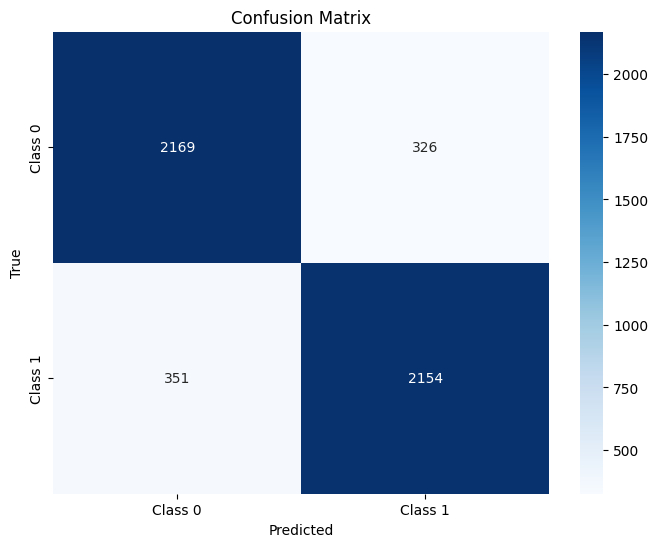

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(test_labels, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.87      2495
     Class 1       0.87      0.86      0.86      2505

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



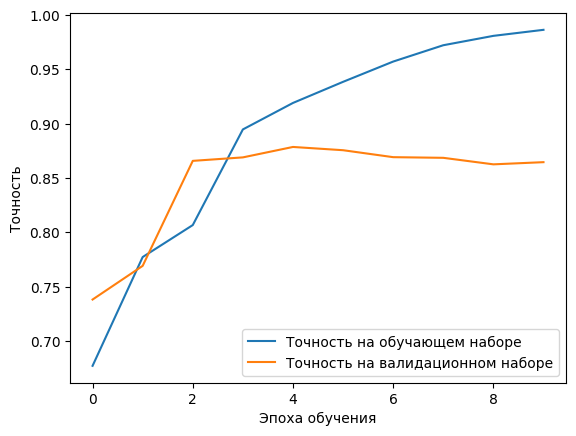

In [39]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на валидационном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()

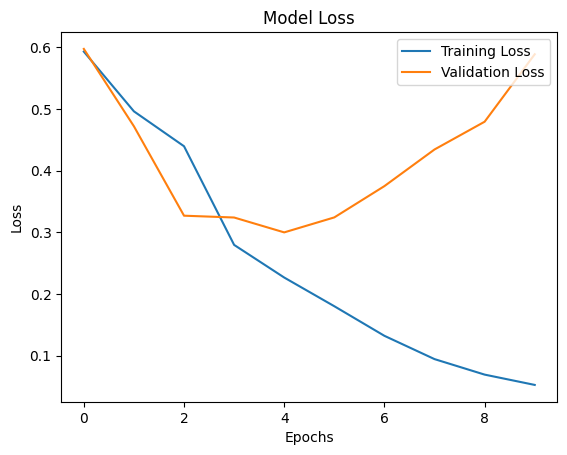

In [40]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()